In [1]:
import matplotlib.pyplot as plt

In [75]:
import json
metrics = {}
for year in range(1993, 2020 + 1):
    with open(f'metrics/{year}_metrics.json') as json_file:
        metrics[year] = json.load(json_file)

In [76]:
dates = list(range(1993, 2020 + 1))

# Diversity

In [4]:
div_comm = []
comm = []
div_party = []
party = []
for y in metrics.keys():
    div_comm.append(metrics[y]['div_comm'][0])
    comm.append(metrics[y]['div_comm'][1])
    div_party.append(metrics[y]['div_party'][0])
    party.append(metrics[y]['div_party'][1])

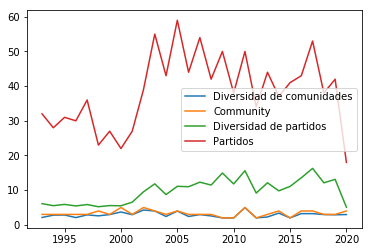

In [5]:
plt.plot(dates, div_comm, label = 'Diversidad de comunidades')
plt.plot(dates, comm, label = 'Community')
plt.plot(dates, div_party, label = 'Diversidad de partidos')
plt.plot(dates,party, label = 'Partidos')
plt.legend()
plt.show()

# Info mutua

In [6]:
info_mutua = []
for y in metrics.keys():
    info_mutua.append(metrics[y]['info_mutua'])

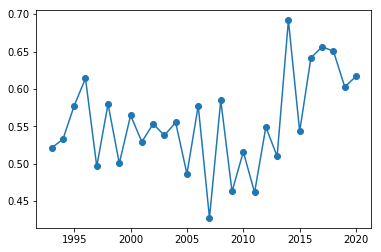

In [7]:
plt.plot(dates, info_mutua, '-o')
plt.show()

# Path mean

In [8]:
path_mean = []
for y in metrics.keys():
    path_mean.append(metrics[y]['shortest_path_mean'])

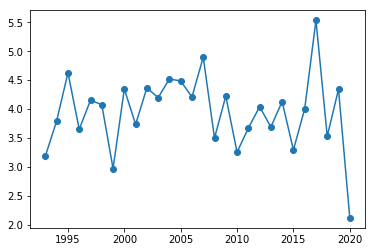

In [9]:
plt.plot(dates, path_mean, '-o')
plt.show()

# Shortest paths

### Justicialismo

In [85]:
all_ideologies = []

for y in metrics.keys():
    justicialismo_paths = metrics[y]['shortest_paths_ideology'][0]['Justicialismo']
    all_ideologies = list(set(all_ideologies + [ideology for ideology in justicialismo_paths.keys()]))

paths_j = {k: [] for k in all_ideologies}

import numpy as np

for y in metrics.keys(): 
    justicialismo_paths = metrics[y]['shortest_paths_ideology'][0]['Justicialismo']
    for ideology in all_ideologies:
        if ideology in list(justicialismo_paths.keys()):
            paths_j[ideology].append(justicialismo_paths[ideology][0])
        else:
            paths_j[ideology].append(np.nan)
            


In [96]:
colores = ['blue','grey','blue','grey','green','yellow','yellow','red','violet']
dict_colores = {k: colores[i] for i,k in enumerate(all_ideologies)}


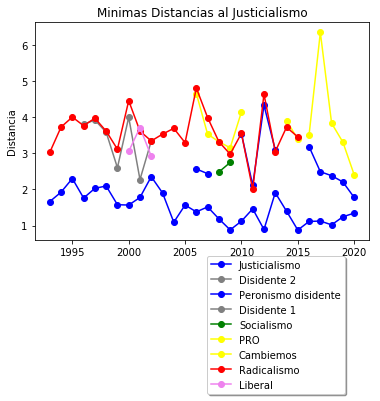

In [97]:
import funciones as f

for i,ideology in enumerate(all_ideologies):
    plt.plot(list(metrics.keys()),paths_j[ideology],'-o',color=dict_colores[ideology], label= f'{ideology}')  
plt.title('Minimas Distancias al Justicialismo') 
plt.ylabel('Distancia')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True)

### Radicalismo

In [90]:
all_ideologies2 = []
#hago anios a mano porque el radicalismo existe hasta el 2015
for y in range(1993,2016):
    radicalismo_paths = metrics[y]['shortest_paths_ideology'][0]['Radicalismo']
    all_ideologies2 = list(set(all_ideologies2 + [ideology for ideology in radicalismo_paths.keys()]))

paths_r = {k: [] for k in all_ideologies2}

for y in range(1993,2016): 
    radicalismo_paths = metrics[y]['shortest_paths_ideology'][0]['Radicalismo']
    for ideology in all_ideologies2:
        if ideology in list(radicalismo_paths.keys()):
            paths_r[ideology].append(radicalismo_paths[ideology][0])
        else:
            paths_r[ideology].append(np.nan)


In [102]:
colores2 = ['blue','grey','blue','grey','green','yellow','red','violet']
dict_colores2 = {k: colores2[i] for i,k in enumerate(all_ideologies2)}

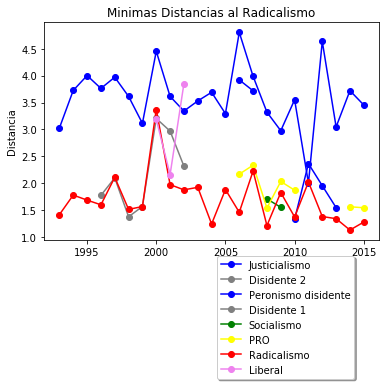

In [103]:

for i,ideology in enumerate(all_ideologies2):
    plt.plot(list(range(1993,2016)),paths_r[ideology],'-o',color=dict_colores2[ideology], label= f'{ideology}')  
plt.title('Minimas Distancias al Radicalismo') 
plt.ylabel('Distancia')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True)

# Modularity

In [54]:
modularity_party = []
modularity_comm = []
for y in metrics.keys():
    modularity_comm.append(metrics[y]['modularity_community'])
    modularity_party.append(metrics[y]['modularity_party'])

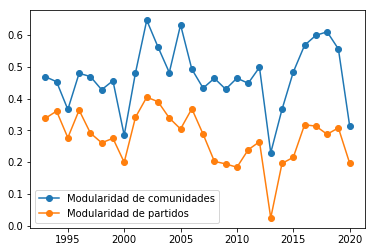

In [57]:
plt.plot(dates, modularity_comm, '-o', label = 'Modularidad de comunidades')
plt.plot(dates, modularity_party, '-o', label = 'Modularidad de partidos')
plt.legend()
plt.show()